---
# <font color="#CA3532">Práctica 3 de Neurocomputación – Curso 2022-2023</font>
### Escuela Politécnica Superior – Universidad Autónoma de Madrid

---
- Fecha de inicio: Lunes 27-03-2023 
- Fecha de entrega: Lunes 1-05-2023 

--- 

Última actualización: 22-03-2023

In [ ]:
### Incluid vuestros nombres, pareja y grupo aquí:
estudiantes = [
    {'nombre': 'Daniel Cerrato Sánchez', 'grupo':2461},
    {'nombre': 'David T. Garitagoitia Romero', 'grupo':2461}
]

Muchos problemas de clasificación binaria no tienen el mismo número de ejemplos de cada clase. En estos casos se dice que la distribución de clases está sesgada o no balanceada. 

Un ejemplo de este problema es el que tienen los reconocedores de voz para clasificar los sonidos vocálicos de las lenguas europeas en *nasales* u *orales*. El *accuracy* (exactitud) en la clasificación es importante para las dos clases, pero no puede usarse en problemas con clases no balanceadas.

# <font color="#CA3532">Datos del problema de los fonemas (Phoneme Dataset)</font>


Para caracterizar cada vocal, se han elegido cinco atributos diferentes. Las amplitudes de los cinco primeros armónicos (AHi), normalizados por la energia total (Ene): AHi/Ene. Cada armónico puede ser positivo, si se corresponde con un máximo local del espectro, o negativo, en caso contrario.

En el *Phoneme Dataset* hay dos clases para los dos tipos de sonidos:

* Class 0: vocales nasales (la clase mayoritaria).
* Class 1: vocales orales (la clase minoritaria).

In [ ]:
# Details https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.names
dataset_url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/phoneme.csv'

# <font color="#CA3532">Exploración de los datos</font>

In [ ]:
from pandas import read_csv
from pandas import DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from collections import Counter

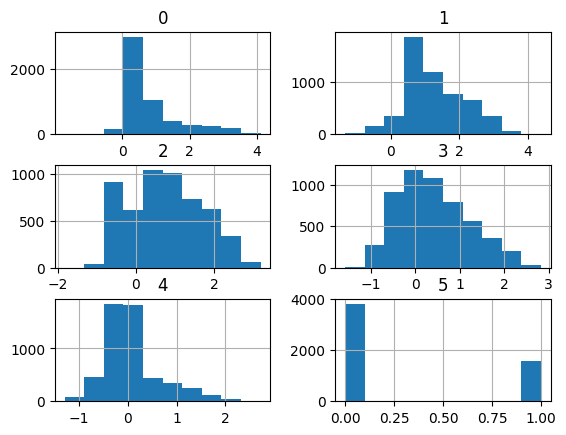

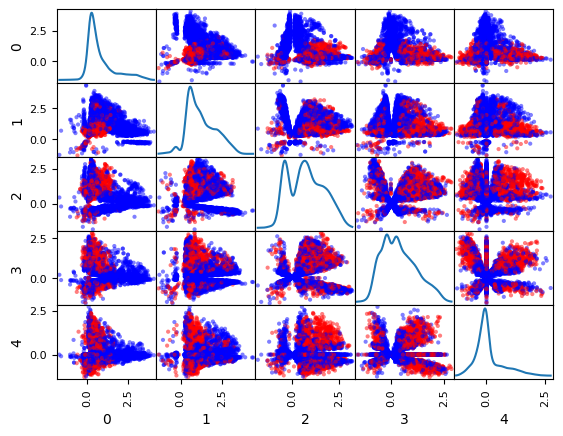

In [ ]:
# define the dataset location
filename = dataset_url

# load the csv file as a data frame
df = read_csv(filename, header=None)

# histograms of all variables 
df.hist()
pyplot.show()

# define a mapping of class values to colors 
color_dict = {0:'blue', 1:'red'}

# map each row to a color based on the class value 
colors = [color_dict[x] for x in df.values[:, -1]]

# drop the target variable
inputs = DataFrame(df.values[:, :-1])

# pairwise scatter plots of all numerical variables scatter_matrix(inputs, diagonal='kde', color=colors)
scatter_matrix(inputs, diagonal='kde', color=colors)
pyplot.show()

### Pregunta 1: ¿Cuál es la distribución de ejemplos en clases? Explica aquí qué son las gráficas anteriores y qué observas en ellas.

Según vemos en los histogramas, los atributos siguen una distribución aparentemente Normal, Gaussiana; y las clases se ven claramente desbalanceadas, ya que las vocales nasales rondan los 3900 (3818) ejemplos mientras que las orales, los 1500 (1586) lo que supone un 70.65% para la clase 0 frente a tan solo un 29.35% de la calse 1.

Por otra parte, las matriz de gráficas inferior muestra la distribución de clases enfrentando pares de atributos y en las diagonales, donde se enfrenta cada atributo consigo mismo, se muestra la función de densidad del atributo.
Estas gráficas se realizan con el objetivo de comprobar si existe alguna relación directa entre atributos de forma que podamos prescindir de alguno y simplificar el modelo

# <font color="#CA3532">Modelado</font>

- En esta práctica usaremos [Keras](https://keras.io/)

- Keras es una biblioteca de redes neuronales de código abierto, diseñada para la experimentación con redes neuronales profundas. Keras es modular, extensible y fácil de usar.

- Keras puede usar distintos motores. Aquí se usará con TensorFlow.

In [ ]:
# Importaciones

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

import keras as k
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler

In [ ]:
dataset = np.loadtxt(dataset_url, delimiter=',')

print(dataset)

### -------------------------------------------------------------------------------
### Dividid los ejemplos en atributos y clases. Guardad el número de atributos.
### -------------------------------------------------------------------------------

x = dataset[:,:-1] #atributos
x_size = x.size
y = dataset[:,-1] #clases

n_atr = x.shape[1] #número de atributos

[[ 1.24   0.875 -0.205 -0.078  0.067  0.   ]
 [ 0.268  1.352  1.035 -0.332  0.217  0.   ]
 [ 1.567  0.867  1.3    1.041  0.559  0.   ]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671  1.   ]
 [ 0.15   0.933  2.363 -0.742 -0.617  0.   ]
 [ 0.137  0.714  1.35   0.972 -0.63   1.   ]]


In [ ]:
# Resultados de la división y el número de atributos
print(x)
print(y)
print(x_size)
print(n_atr)

[[ 1.24   0.875 -0.205 -0.078  0.067]
 [ 0.268  1.352  1.035 -0.332  0.217]
 [ 1.567  0.867  1.3    1.041  0.559]
 ...
 [ 1.031  0.584  1.866  1.532 -0.671]
 [ 0.15   0.933  2.363 -0.742 -0.617]
 [ 0.137  0.714  1.35   0.972 -0.63 ]]
[0. 0. 0. ... 1. 0. 1.]
27020
5


In [ ]:
# Normalizad los datos (si es necesario)

scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

## <font color="#CA3532">Definición de la red neuronal</font>

- Cada capa del modelo lleva definidas una serie de propiedades (tamaño, función de activación, conectividad, etc.) que podrás encontrar en https://keras.io/api/layers/core_layers/dense/.

- Usaremos el modelo secuencial que Keras para crear una red neuronal multicapa con propagación hacia adelante.



In [ ]:
# Definid el modelo con Keras

nn = Sequential()

### -------------------------------------------------------------------------------
### Añadir la capas completamente conectadas que consideréis al modelo
### -------------------------------------------------------------------------------

#nn.add(Dense(5, activation="sigmoid"))
nn.add(Dense(10, activation="relu"))
nn.add(Dense(10, activation="relu"))
nn.add(Dense(1, activation="relu"))

## <font color="#CA3532">Compilación de la red neuronal</font>

- La compilación es la operación que contruye la red neuronal.

- La compilación incluye aspectos que se tendrán en cuenta en el entrenamiento de la red neuronal.

- En la secciones de abajo encontraréis enlaces a la documentación oficial donde podréis encontrar información sobre las distintas estrategias de cada uno de los aspectos.

- También es posible definid vuestras propias funciones.






#### <font color="#CA3532">Optimizador</font>

El optimizador es la estrategia para calcular las correcciones de los pesos.

https://keras.io/api/optimizers/

In [ ]:
optimizer = "Adam"
#optimizer = "SGD"

#### <font color="#CA3532"> Función de error (*Loss function*)</font>

La función de error calcula la cantidad que el modelo debe minimizar durante el entrenamiento.

https://keras.io/api/losses/

In [ ]:
loss = "mse"
# loss = "binary_crossentropy"

#### <font color="#CA3532">Métricas</font>

Una métrica es una función que juzga la actuación del modelo. Son funciones similares a las funciones de error pero, a diferencia de estas, no se aplican durante el entrenamiento, sino sobre los resultados. También pueden usarse las funciones de error como metricas.

https://keras.io/api/metrics/

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
metrics = [
            keras.metrics.TruePositives(name='tp'),
            keras.metrics.FalsePositives(name='fp'),
            keras.metrics.TrueNegatives(name='tn'),
            keras.metrics.FalseNegatives(name='fn'),
            keras.metrics.BinaryAccuracy(name='ACC'),
            keras.metrics.Precision(name='P'),
            keras.metrics.Recall(name='R'),
            keras.metrics.AUC(name='auc'),
            keras.metrics.AUC(name='PRC', curve='PR'),
          ]

In [ ]:
# nn.compile(optimizer='SGD', loss="mse", metrics="accuracy")
nn.compile(optimizer=optimizer, loss=loss, metrics=metrics+[f1_m])

# Pregunta 2: Explica con detalle las métricas y funciones de pérdida que son relevantes para este problema e indica cómo se calculan. Explica porqué *accuracy* no es una buena medida para problemas desbalanceados. ¿Qué son las curvas ROC y PR, y para qué sirven?

En este caso, usaremos las métricas Binary Accuracy, Precision y Recall, además de usar las curvas ROC y PR y calcular las métricas necesarias para realizar una matriz de confusión.

Binary Accuracy es una métrica que calcula la cantidad de aciertos que tiene la red sabiendo que la salida es binaria, esto simplemente es comparar la salida obtenida con la esperada y ver si son iguales o no. Simplemente suma los aciertos y divide entre el total de predicciones.

Precision es una métrica que calcula la calidad del modelo. Para ello, compara los verdaderos positivos frente a todas las predicciones de positivos. Este valor indica si el modelo se equivocará mucho o poco a la hora de clasificar.

Recall es una métrica que calcula la cantidad de positivos que es capaz de reconocer el modelo. Para ello, compara los verdaderos positivos frente a los positivos reales.

Para este problema, usar un Accuracy puede llevar a error, puesto que los Accuracy miden el porcentaje de aciertos tanto positivos como negativos frente al total de predicciones. Si las clases están desbalanceadas, la red puede llegar a darse cuenta de que es más fácil acertar si "predice" la clase abundante. Esto es un problema, porque no está prediciendo, no nos indica si ha aprendido realmente.

En cuanto a las funciones de error o pérdida, son funciones que calculan cuan alejados están los valores predichos de los valores reales; y usaremos dos:

MSE (Mean Squared Error o error cuadrático medio) calcula la suma de los cuadrados de las diferencias entre los valores predichos y la clase esperada, todo ello dividido entre la cantidad de predicciones.

"binary_crossentropy" calcula la suma de las entropías de las predicciones dividida entre el número de predicciones en negativo. Se debe entender que las entropías calculadas son por predicción, es decir, cada predicción conlleva un valor predicho que se aleja más o menos del valor real y que aporta más o menos a la entropía de la predicción. Esta función penaliza más a los valores predichos que se alejan más de los reales y menos a los cercanos, de forma logarítmica.

La curva PR es una curva que se dibuja en una gráfica que enfrenta la precisión y el recall de un modelo. La idea es que la curva se acerque todo lo posible a la esquina superior izquierda (ambas métricas con valores altos), ya que representa la degradación que sufre la precisión cuando aumenta el recall.

La curva ROC es una curva que se dibuja en una gráfica que enfrenta el recall y el ratio de falsos positivos. Esta curva muestra la efectividad/sensibilidad de nuestro modelo a la hora de detectar verdaderos positivos y no confundirse con los falsos positivos. La idea es que la curva se acerque lo máximo posible a la esquina superior izquierda, donde reside un alto recall y un bajo ratio de falsos positivos.

En este problema, es probable que la curva PR nos devuelva información más fiable que la curva ROC, ya que trabaja mejor que la curva ROC con datasets no balanceados.

## <font color="#CA3532">Entrenamiento de la red neuronal</font>

El método "fit" entrena una red neuronal con los datos que se le proporcionen.

Usaremos un 20 % de los datos para validación aunque están permitidas otras maneras de validar, incluso de optimizar de parámetros.

https://keras.io/api/models/model_training_apis/#fit-method

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2) 

# history = nn.fit(x, y, epochs=4, verbose=1, validation_split=0.2)
# history = nn.fit(x, y, epochs=500, verbose=1, validation_split=0.2)
history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                60        
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


## <font color="#CA3532">Visualización de resultados del entrenamiento</font>

- El objeto *history* guarda los resultados de cada época.

dict_keys(['loss', 'tp', 'fp', 'tn', 'fn', 'ACC', 'P', 'R', 'auc', 'PRC', 'f1_m', 'val_loss', 'val_tp', 'val_fp', 'val_tn', 'val_fn', 'val_ACC', 'val_P', 'val_R', 'val_auc', 'val_PRC', 'val_f1_m'])


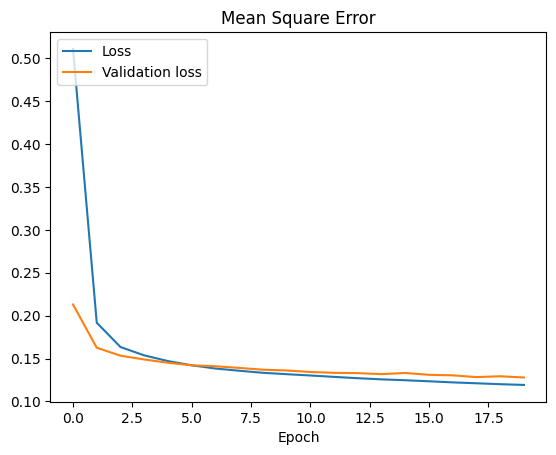

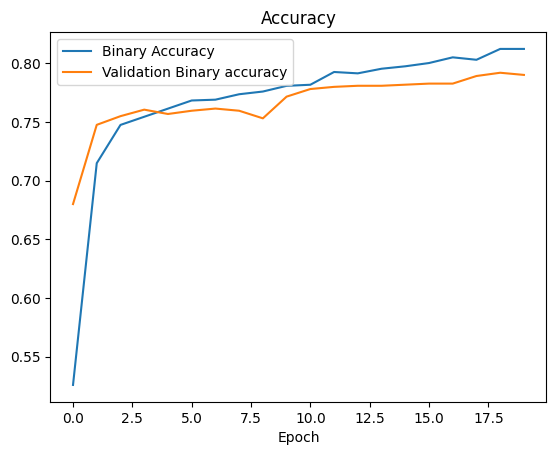

In [ ]:
# Visualizar los resultados del entrenamiento, aquí tenéis un ejemplo de cómo hacerlo:
print(history.history.keys())

plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Mean Square Error')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

plt.plot(history.history['ACC'], label='Binary Accuracy')
plt.plot(history.history['val_ACC'], label='Validation Binary accuracy')
plt.title('Accuracy')
plt.ylabel('')
plt.xlabel('Epoch')
plt.legend(loc="upper left")
plt.show()

## <font color="#CA3532">Evaluación de la red neuronal</font>


In [ ]:
# Evaluación (es como Fit en tanto que realiza una época con todos los datos pero sin cambiar ningún peso de la red neuronal)
"""
loss, accuracy, precision, recall = nn.evaluate(x_train, y_train)
print('Train Accuracy: %.2f' % (accuracy * 100))
print('Train Precision: %.2f' % (precision * 100))
print('Train Recall: %.2f' % (recall * 100))

loss, accuracy, precision, recall = nn.evaluate(x_val, y_val)
print('Validation Accuracy: %.2f' % (accuracy * 100))
print('Validation Precision: %.2f' % (precision * 100))
print('Validation Recall: %.2f' % (recall * 100))
"""

print('Train')
results = nn.evaluate(x_train, y_train)
print('\nTest')
results = nn.evaluate(x_val, y_val)

Train
136/136 [==============================] - 1s 4ms/step - loss: 0.1180 - tp: 814.0000 - fp: 342.0000 - tn: 2703.0000 - fn: 464.0000 - ACC: 0.8136 - P: 0.7042 - R: 0.6369 - auc: 0.8966 - PRC: 0.7673 - f1_m: 0.6560

Test
34/34 [==============================] - 0s 5ms/step - loss: 0.1279 - tp: 198.0000 - fp: 117.0000 - tn: 656.0000 - fn: 110.0000 - ACC: 0.7900 - P: 0.6286 - R: 0.6429 - auc: 0.8698 - PRC: 0.7008 - f1_m: 0.6286


34/34 [==============================] - 0s 1ms/step


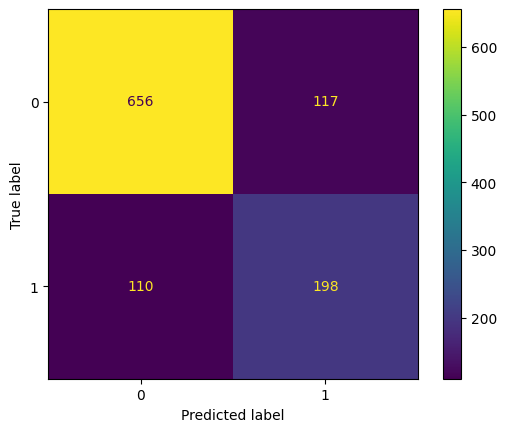

              precision    recall  f1-score   support

         0.0       0.86      0.85      0.85       773
         1.0       0.63      0.64      0.64       308

    accuracy                           0.79      1081
   macro avg       0.74      0.75      0.74      1081
weighted avg       0.79      0.79      0.79      1081



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Además de "evaluate", hay otro método, "predict", que sirve para etiquetar datos no etiquetados.
y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5

cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
print(classification_report(y_val, y_pred))


- Cambiad la arquitectura de la red neuronal introduciendo más capas y neuronas para conseguir mejores resultados:
 - Añadir más capas o diferente tipo de capas.
 - Cambiad las funciones de activación.
 - Cambiad la función de error o el optimizador.

### Pregunta 3: Explica con detalle las pruebas realizadas y los resultados obtenidos.

Realizaremos las pruebas modificando los distintos hiperparámetros que se indican en la celda anterior.

Como existen 5 atributos y, por tanto, 5 entradas de datos, probaremos con 1 o 2 capas ocultas de 3, 5, 8 y 10 neuronas, según los resultados que vayamos obteniendo.

Además, probaremos a cambiar las funciones de activación entre sigmoidal y relu, los optimizadores entre adam y sgd y las funciones de pérdida o error entre mse y binary_crossentropy.

Usaremos todas las métricas propuestas en la práctica, aunque nos apoyaremos en la matriz de confusión y tabla de métricas final para comparar y decidir. En especial, el valor de F1 será especialmente útil, ya que conjunta la precision y el recall.

Para cada configuración, realizaremos dos o tres ejecuciones para escoger el mejor resultado de cada una, tratando de reducir el efecto de la aleatoriedad de los conjuntos de prueba y test.

Primero hemos modificado las neuronas con solo una capa, en este caso hemos visto que 5 neuronas dan el mejor resultado de los 5 que indicamos anteriormente.

A continuación, hemos hecho pruebas con dos capas y exiten varias distribuciones que obtienen prácticamente los mejores y mismos resultados: (5,3), (5,5), (8,3)... Por pequeños detalles en las métricas y en la forma de las gráficas de aprendizaje, hemos decidido que la mejor es (5,5). En comparación con el modelo de una sola capa, este último es ligeramente peor, pero podemos decir que los mejores resultados se encuentran rondando las 5 neuronas.

Lo siguiente en nuestro itinerario es probar estos resultados con la normalización. Los datos tienen rangos muy parejos, así que no esperamos que mejoren mucho los modelos. Simplemente probaremos el mejor de una capa y de dos capas.

Tras las pruebas, como era de esperar, los modelos no mejoraron; incluso, empeoraron ligeramente, así que continuaremos con los datos sin normalizar.

Ahora vienen los cambios en el resto de hiperparámetros, empezamos con la función de activación. Probaremos con los mejores resultados de una y dos capas, cambiando primero las capas ocultas y de salida por separado y, por último, ambas a la vez.

Las pruebas con relu han sido muy satisfactorias, han mejorado enormemente los resultados. Los mejores resultados se obtuvieron cambiando todas las capas a esta función de activación, las mezclas no fueron especialmente efectivas. Pero el cambio es tal que decidimos probar a cambiar el número de neuronas, por si existía una mejor combinación con esta función. Para nuestra sorpresa, una vez más, así fue. Dos capas de 10 neuronas cada una consiguió el mejor registro hasta el momento.

A continuación, modificamos el optimizador. Probamos SGD con el mejor modelo hasta el momento y los dos mejores modelos anteriores, para evitar que el cambio de densidad de capas ocultas con relu sea algo puntual.

Los resultados indican que el mejor optimizador para este problema es Adam, para los tres modelos probados. Se hizo una prueba con sigmoidal, para descartar. La combinación sigmoidal con SGD no es buena para estos problemas desbalanceados.

Por último, probamos la función de pérdida 'binary_crossentropy', con los mismos modelos anteriores. No se han notado mejoras en este ámbito, por lo que podemos decir que "mse" es mejor que "binary_crossentropy" para este problema.

Sabemos que realmente habría sido mejor mantener un conjunto de train y test común para todos los modelos y tomar la media de todas las ejecuciones realizadas para cada modelo o incluso coger el peor de todos los casos. Sin embargo, cuando se llegó a esta conclusión gracias al profesor, ya habíamos realizado prácticamente todas las pruebas de este apartado y decidimos continuar cogiendo el mejor de todos los casos, relanzando ejecuciones con conjuntos nuevos para cada caso.

Se dedició así porque entendimos que está parte de la práctica consistía en observar los cambios en la eficacia del modelo según se van modificando los hiperparámetros, para comprobar cual podría ser la mejor combinación de ellos, viendo como afecta cada uno a esta eficacia.

## <font color="#CA3532">Optimización del diseño de la red neuronal</font>




Utiliza RandomSearch para la búsqueda de los valores de los hiperparámetros del modelo que mejoren los resultados. Consulta su funcionamiento en https://keras.io/keras_tuner/ y https://keras.io/api/keras_tuner/tuners/random/.

In [ ]:
!pip install -U keras-tuner
from kerastuner.tuners import RandomSearch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Aquí tenéis un ejemplo que podéis adaptar

import kerastuner

def build_model(hp):
    nn = Sequential()
    nn.add(Dense(hp.Int('units1', min_value=8, max_value=128, step=8), hp.Choice('activation', ["relu", "sigmoid"])))
    nn.add(Dense(hp.Int('units2', min_value=8, max_value=128, step=8), hp.Choice('activation2', ["relu", "sigmoid"])))
    nn.add(Dense(1, hp.Choice('activation3', ["relu", "sigmoid"])))
    # nn.compile(optimizer='SGD', loss="mse", metrics="accuracy")
    nn.compile(hp.Choice('optimizer', values=["Adam", "SGD"]), hp.Choice('loss', values=["mse", "binary_crossentropy"]), metrics=[f1_m])
    return nn

tuner = RandomSearch(build_model, objective=kerastuner.Objective("val_f1_m", direction="max"), executions_per_trial=3) 

tuner.search_space_summary()

tuner.search(x, y, epochs=5, validation_split=0.2)

Search space summary
Default search space size: 7
units1 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
units2 (Int)
{'default': None, 'conditions': [], 'min_value': 8, 'max_value': 128, 'step': 8, 'sampling': 'linear'}
activation2 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
activation3 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid'], 'ordered': False}
optimizer (Choice)
{'default': 'Adam', 'conditions': [], 'values': ['Adam', 'SGD'], 'ordered': False}
loss (Choice)
{'default': 'mse', 'conditions': [], 'values': ['mse', 'binary_crossentropy'], 'ordered': False}


In [ ]:
best_nn = tuner.get_best_models(num_models=1)

In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_f1_m", direction="max")

Trial 05 summary
Hyperparameters:
units1: 24
activation: relu
units2: 24
activation2: relu
activation3: relu
optimizer: Adam
loss: mse
Score: 0.6967025796572367

Trial 03 summary
Hyperparameters:
units1: 8
activation: relu
units2: 72
activation2: sigmoid
activation3: sigmoid
optimizer: Adam
loss: mse
Score: 0.6085615356763204

Trial 01 summary
Hyperparameters:
units1: 56
activation: sigmoid
units2: 112
activation2: sigmoid
activation3: sigmoid
optimizer: Adam
loss: binary_crossentropy
Score: 0.5822905898094177

Trial 07 summary
Hyperparameters:
units1: 16
activation: relu
units2: 32
activation2: relu
activation3: relu
optimizer: SGD
loss: binary_crossentropy
Score: 0.3941253423690796

Trial 09 summary
Hyperparameters:
units1: 80
activation: sigmoid
units2: 8
activation2: sigmoid
activation3: relu
optimizer: Adam
loss: binary_crossentropy
Score: 0.37789889176686603

Trial 02

### Pregunta 4: Explica con detalle la optimización realizada y los resultados obtenidos.
El random search se encargará de probar de manera aleatoria valores de parámetros de la red neuronal ordenando los resultados por score, de esta forma comprobará dentro de los rangos seleccionados y con combinaciones aleatorias la mejor combinación.
Como podemos ver la mejor combinación se logra con la siguiente combinación de parámetros:

units1: 24

activation: relu

units2: 24

activation2: relu

activation3: relu

optimizer: Adam

loss: mse

Score: 0.6967025796572367

Lo cual coincide con las pruebas hechas en las búsquedas manuales donde se vió como las funcioes de activación relu ofrecian mejores resultados junto con Adam y mse, diferenciándose de nuestras pruebas en la densidad donde los mejores resultados fueron con valores más altos de los que llegamos a probar.


# <font color="#CA3532">Técnicas para problemas desbalanceados</font>

Usaremos algunas técnicas para preparar los datos para ajustar un modelo:
- Técnicas de muestreo
  - Técnicas de submuestreo
  - Técnicas de sobremuestreo
- Técnicas de aprendizaje con costes


In [ ]:
!pip install -U imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <font color="#CA3532">Técnica de submuestreo</font>

Estudia como utilizar [RandomUnderSample](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html) de Imbalance-Learn para confeccionar un conjunto de datos (a partir del original) que contenga en mismo número de ejemplos de la clase mayoritaria que el número de ejemplos en la clase minoritaria. Construye un modelo con estos datos y estudia los resultados. 

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
aux = sorted(Counter(y).items())
"""
Como nos piden que ambas clases tengan el mismo número de ejemplos, empleamos sampling_strategy='majority' que reducirá los casos de la clase mayoritaria hasta que ambas
clases tengan el mismo número de ejemplos.
Si sustituimos ese valor por un float, por ejemplo 0.5, la clase mayoritaría se reducirá hasta que la minoritaria sea 0.5 de la mayoritaria
es decir si tenemos 100 ejmplos de clase minoritaria, la clase mayoritaría se reducirá hasta 200 ejemplos.
"""
rus = RandomUnderSampler(sampling_strategy='majority') #para que afecte a la clase mayoritaria y la reduzca hasta que tenga lo mismo que la minoritaria
print((aux[0][1]/4.0))
x_resampled, y_resampled = rus.fit_resample(x, y)

print(sorted(Counter(y_resampled).items()))

954.5
[(0.0, 1586), (1.0, 1586)]


20/20 [==============================] - 0s 3ms/step


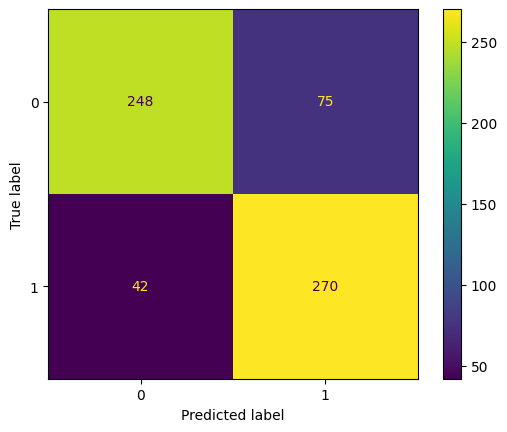

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.81       323
         1.0       0.78      0.87      0.82       312

    accuracy                           0.82       635
   macro avg       0.82      0.82      0.82       635
weighted avg       0.82      0.82      0.82       635



In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

x_train, x_val, y_train, y_val = train_test_split(x_resampled, y_resampled, test_size=0.2) 

history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_val, y_pred))

## <font color="#CA3532">Técnica de sobremuestreo</font>

Estudia como utilizar [RandomOverSample](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html#imblearn.over_sampling.RandomOverSampler) de Imbalance-Learn para confeccionar un conjunto de datos (a partir del original) que contenga en mismo número de ejemplos de la clase minoritaria que el número de ejemplos en la clase mayoritaria. Construye un modelo con estos datos y estudia los resultados. 

In [ ]:
from imblearn.over_sampling import RandomOverSampler

print(sorted(Counter(y).items()))
ros = RandomOverSampler(sampling_strategy='minority')
x_resampled, y_resampled = ros.fit_resample(x, y)


print(sorted(Counter(y_resampled).items()))

[(0.0, 3818), (1.0, 1586)]
[(0.0, 3818), (1.0, 3818)]


48/48 [==============================] - 0s 2ms/step


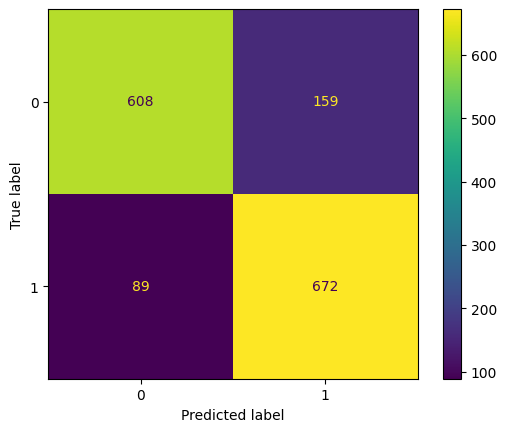

              precision    recall  f1-score   support

         0.0       0.87      0.79      0.83       767
         1.0       0.81      0.88      0.84       761

    accuracy                           0.84      1528
   macro avg       0.84      0.84      0.84      1528
weighted avg       0.84      0.84      0.84      1528



In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_resampled, y_resampled, test_size=0.2) 

history = nn.fit(x_train, y_train, epochs=20, verbose=0, validation_data=(x_val, y_val))

y_pred = nn.predict(x_val)
y_pred = y_pred > 0.5
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

print(classification_report(y_val, y_pred))

## <font color="#CA3532">Técnica de apredizaje con costes</font>

Estudia como utilizar el parámetro de [fit](https://keras.io/api/models/model_training_apis/) en keras para asignar un peso distinto a cada clase del problema de manera que se tenga en cuenta durante el aprendizaje. Construye un modelo que use class_weight con los datos originales y estudia los resultados.

In [86]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2) 
aux = sorted(Counter(y_train).items())
print(aux[0][1]) #elementos
print(aux[1][1])

# Crea un diccionario con los valores de peso de clase que deseas probar
param_grid = {'class_weight': ["Balanced"]}
for cWeight in range(0, 5, 1):
  for cWeight2 in range(0, 5, 1):
    class_weight = {0: cWeight,
                    1: cWeight2,}
    param_grid['class_weight'].append(class_weight)

print(param_grid)

# Crea un objeto de regresión logística
lr = LogisticRegression()
#utilizamos el modelo que mejor resultados nos entregó anteriormente
def create_model():
    nn = Sequential()
    nn.add(Dense(24, activation="relu"))
    nn.add(Dense(24, activation="relu"))
    nn.add(Dense(1, activation="relu"))
    nn.compile(optimizer="Adam", loss="mse", metrics=metrics+[f1_m])
    return nn


model = KerasClassifier(build_fn=create_model)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='f1')

# Entrena el modelo con GridSearchCV
grid_search.fit(x_train, y_train)

# Muestra el mejor valor de peso de clase y la puntuación f1 obtenida
print("Best class weight: ", grid_search.best_params_['class_weight'])
print("Best f1 score: ", grid_search.best_score_)

"""bestf1=-1
bestCWeight = {}
fLoop = math.ceil(aux[1][1]/aux[0][1])
for cWeight in range(0, 2, 1):
  for cWeight2 in range(0, 2, 1):
    class_weight = {0: cWeight,
                    1: cWeight2,}
    print(class_weight)
    history = nn.fit(x_train, y_train, epochs=20, verbose=0, class_weight=class_weight, validation_data=(x_val, y_val))
    y_pred = nn.predict(x_val)
    #y_pred = y_pred > 0.5
    cm = confusion_matrix(y_val, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    #disp.plot()
    #plt.show()
    report = classification_report(y_val, y_pred)
    print(report)
    f1 = f1_score(y_val, y_pred , average="macro")
    if(f1>bestf1):
      bestf1=f1
      bestCWeight = class_weight

print("Best F1: "+ str(bestf1))
print("Best Weights: " + str(bestCWeight))"""

3046
1277
{'class_weight': ['Balanced', {0: 0, 1: 0}, {0: 0, 1: 1}, {0: 0, 1: 2}, {0: 0, 1: 3}, {0: 0, 1: 4}, {0: 1, 1: 0}, {0: 1, 1: 1}, {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 4}, {0: 2, 1: 0}, {0: 2, 1: 1}, {0: 2, 1: 2}, {0: 2, 1: 3}, {0: 2, 1: 4}, {0: 3, 1: 0}, {0: 3, 1: 1}, {0: 3, 1: 2}, {0: 3, 1: 3}, {0: 3, 1: 4}, {0: 4, 1: 0}, {0: 4, 1: 1}, {0: 4, 1: 2}, {0: 4, 1: 3}, {0: 4, 1: 4}]}


<ipython-input-86-c2d873cdf999>:34: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


46/46 [==============================] - 0s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3 fits failed out of a total of 78.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 248, in fit
    return super().fit(x, y, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/wrappers/scikit_learn.py", line 175, in fit
    history = self.model.fit(x, y, **fit_args)
  File "/usr/local/lib/python3.10/di

136/136 [==============================] - 3s 5ms/step - loss: 0.3663 - tp: 276044.0000 - fp: 428865.0000 - tn: 1023720.0000 - fn: 326324.0000 - ACC: 0.6325 - P: 0.3916 - R: 0.4583 - auc: 0.5963 - PRC: 0.3699 - f1_m: 0.5905
Best class weight:  {0: 1, 1: 4}
Best f1 score:  0.64015846894558


'bestf1=-1\nbestCWeight = {}\nfLoop = math.ceil(aux[1][1]/aux[0][1])\nfor cWeight in range(0, 2, 1):\n  for cWeight2 in range(0, 2, 1):\n    class_weight = {0: cWeight,\n                    1: cWeight2,}\n    print(class_weight)\n    history = nn.fit(x_train, y_train, epochs=20, verbose=0, class_weight=class_weight, validation_data=(x_val, y_val))\n    y_pred = nn.predict(x_val)\n    #y_pred = y_pred > 0.5\n    cm = confusion_matrix(y_val, y_pred)\n    disp = ConfusionMatrixDisplay(confusion_matrix=cm)\n    #disp.plot()\n    #plt.show()\n    report = classification_report(y_val, y_pred)\n    print(report)\n    f1 = f1_score(y_val, y_pred , average="macro")\n    if(f1>bestf1):\n      bestf1=f1\n      bestCWeight = class_weight\n\nprint("Best F1: "+ str(bestf1))\nprint("Best Weights: " + str(bestCWeight))'

### Pregunta 5: Describe los experimentos realizados y los resultados obtenidos. Puedes combinar estás ténicas con la búsqueda de hiperparámetros para optimizar los modelos.

Durante la primera parte empleamos técnica de sobremuestreo y submuestro, para ellas hemos utilizado over y undersampler con los valores en minority y mayority para que contenga en mismo número de ejemplos de la clase mayoritaria que el número de ejemplos en la clase minoritaria y vicebers.
Como podemos ver, efectivamente después de las técnicas ambas clases tienen el mismo número de ejemplos:
Submuestreo: [(0.0, 1586), (1.0, 1586)]
Sobremuestreo: [(0.0, 3818), (1.0, 3818)] 

Tras emplear estas técnicas, vemos una mejora notable dentro del f1-score.
Anteriormente los mejores valores no llegaban al 0.7 (0.6967025796572367) sin embargo, tras las técnicas de muestreo, el f1-score sube hasta llegar a superar el 0.8 tanto para el submuestro como para el sobremuestreo, con una leve mejora en el sobremuestreo (0.83 frente al 0.84)

Para este apartado se ha realizado un grid search probando dentro de un rango diferentes pesos para clase guardando los mejores valores.
hemos probado con pesos entre 0 y 4, obteniendo que los mejores resultados se lograron para la combinación.

Best class weight:  {0: 1, 1: 4}
Best f1 score:  0.64015846894558

Como vemos, el peso de la clase 1 es 4 veces mayor que el de la clase 0.
Esto tiene sentido pues como vimos, la clase 0 cuenta con 1500 (1586) lo que supone un 70.65% frente a tan solo un 29.35% de la calse 1. Es por ello por lo que sibir el peso de la clase minoritaria subiría a su vez ese f1-score logrando compensar el desequilibrio de las clases, ya que al estar desequilibrada, puede existir tendencia a predecir la clase mayoritaria dando lugar a una alta precisión aunque una menor probabilidad de acertar la clase minoritaria, es por ello que subiendo el peso de esta, se produce que el modelo le preste mayor atención y mejore su capacidad de predecir, detectar y clasificar.


# <font color="#CA3532">Pregunta 6: Conclusiones generales</font>

Resume el trabajo hecho en esta práctica y las conclusiones que hayas sacado.

En esta práctica hemos buscado hallar los mejores hiperparámetros obteniendo los mejores resultados de las métricas con nuestras redes neuronales tras una búsqueda exhaustiva mediante diferentes técnicas de optimización entre las que incluimos la búsqueda manual, random y grid search entre otros, además se experimentó con diferentes configuraciones de peso y número de ejemplos de las clases buscando igualar los ejemplos de las clases mediantes under y over samplers.

Los resultados obtenidos en la búsqueda manual concuerdan con los resultados logrados por el random search, que consigue resultados similares a los que logramos con las búsquedas manuales ratificando los resultados obtenidos con anterioridad. siendo la mejor configurción aquella que emplea:
- Funciones de activación relu para las neuronas
- Optimizador Adam
- Función de perdida mse

Por último probamos utilizar under y over sampler para igualar el número de ejemplos de cada clase arrojando unos resultados muy satisfactorios con una mejora notable en las métricas.

Finalmente concluimos la práctica con una búsqueda de rejilla para ver cual podría ser la mejor combinación de pesos para las clases

Los resultados obtenidos muestran que la combinación de técnicas de optimización y el uso de pesos de clase adecuados pueden mejorar significativamente el rendimiento del modelo, encontrando importante el uso de activación relu para las neuronas, optimizador adam, función de perdida mse y en especial la optimización del numero de ejemplos que nos ayudo a mejorar el F1 score al abordar el problema de desequilibrio.

Misma conlusión obtenemos del cambio de pesos, que nos muestra como un incrementó en la clase minoritaria aporta una mejora en el F1 score nuevamente por el porblema del desequilibrio.

Sin embargo, también es importante mencionar que un aumento excesivo de los pesos de las clases puede llevar a un sobreajuste del modelo y reducir su capacidad para generalizar a datos nuevos, por lo tanto, es necesario actuar con cautela al ajustar pesos y comprobar con validaciones (preferiblemente cruzadas) para evaluar el rendimiento del modelo tras los cambios.. 

Por lo tanto, se recomienda un enfoque cuidadoso al ajustar los pesos de clase y utilizar técnicas de validación cruzada para evaluar el rendimiento del modelo en datos nuevos.

En resumen, este trabajo destaca la importancia de realizar una exploración exhaustiva de hiperparámetros y experimentar con diferentes técnicas para abordar los desafíos del diseño de redes neuronales.
